In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime, timedelta #For timestamps

In [8]:
car_df = pd.read_csv('USA_cars_datasets.csv')

car_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [10]:
car_df['title_status'].value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

In [11]:
#It is assumed that the average car owner puts about 12,000 miles on a car each year.
#To determine whether a car has reasonable mileage, you can simply multiply 12,000 by its age. 
#That means good mileage for a car that’s 5 years old is 60,000.

In [12]:
#Lets get the current year
now = datetime.now()

In [13]:
#Test to see if it would return the different between current year and specified year.
now.year - 2010

11

In [14]:
#lets determine how old each car would be by creating a column car_age

In [15]:
car_df['car_age'] = now.year - car_df['year']

In [16]:
#Let's preview the new column

car_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,13
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,10
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,3
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3


In [17]:
#Based on the assumption that the average car owner puts about 12,000 miles on a car each year.
#Lets create a column called assum_mil which would be the car_age * 12,000 and compare it against its actual milage stated 

In [18]:
#lets get a Reasonable Assumption of what the Mileage should be
car_df['assum_mil'] = car_df['car_age'] * 12000

In [19]:
#Preview the data
car_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,13,156000
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,10,120000
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,3,36000
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7,84000
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3,36000


In [20]:
#Now that we have both the recorded(mileage) and estimated reasonable mileage(assum_mil),
#lets get the difference between the two

In [21]:
car_df['diff_mil'] = car_df['assum_mil'] - car_df['mileage']  

car_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,13,156000,-118117.0
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,10,120000,-70552.0
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,3,36000,-3590.0
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7,84000,19854.0
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3,36000,29346.0


In [22]:
#The whole idea behind the car_df['diff_mil'] column, is to determine if the recorded mileage is higher or lower than
#the estimated reasonable mileage based on car_age * assummed yearly 12,000

In [23]:
#Lets copy the data of cars whos recorded mileage is lower than the estimated mileage and term them as Decent buys
DecBuy_df = car_df[car_df['diff_mil'] > 0].copy()

In [24]:
DecBuy_df.shape

(1315, 16)

In [25]:
car_df.shape

(2499, 16)

In [26]:
#By comparing the shape of both the original data set car_df and the newly formed DecBuy_df we can see that 
#about 1,184 cars did not meet the Reasonable mileage criteria.

In [27]:
DecBuy_df.head()
#This newmly created data has two category of cars based on their status i.e
#Clean Vechicle
#salvage insurance(Vechicles previously involved in an accident) 

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7,84000,19854.0
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3,36000,29346.0
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,4,48000,24475.0
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,3,36000,26629.0
10,10,10400,dodge,coupe,2009,clean vehicle,107856.0,orange,2b3lj54t49h509675,167753874,georgia,usa,22 hours left,12,144000,36144.0


In [28]:
#Lets get a preview of cars made in 2008, within the dataframe
DecBuy_df[DecBuy_df['year']==2008].head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil
29,29,13000,ford,chassis,2008,clean vehicle,93698.0,white,1fdwf37r28eb95687,167754098,tennessee,usa,22 hours left,13,156000,62302.0
248,248,26500,ford,pickup,2008,clean vehicle,62015.0,white,1ftxw43r18eb10682,167758527,pennsylvania,usa,1 days left,13,156000,93985.0
251,251,8000,ford,chassis,2008,clean vehicle,132379.0,white,1fdxf46r08ea18180,167758623,florida,usa,2 days left,13,156000,23621.0
359,359,25,chevrolet,door,2008,salvage insurance,130623.0,white,1gnfc13j88r167278,167650817,california,usa,8 days left,13,156000,25377.0
374,374,1000,acura,door,2008,salvage insurance,118250.0,gray,5j8tb18578a010979,167362709,michigan,usa,2 days left,13,156000,37750.0


In [29]:
#Let's find out the number of cars, based on their condition
DecBuy_df['title_status'].value_counts()

#We can see the number of vehicles, split by their status

clean vehicle        1245
salvage insurance      70
Name: title_status, dtype: int64

In [33]:
#lets get a preview of the salvaged cars
DecBuy_df[DecBuy_df['title_status']=='salvage insurance'].head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil
188,188,175,chrysler,door,2000,salvage insurance,231240.0,red,2c3hd46r3yh208325,167756464,north carolina,usa,3 days left,21,252000,20760.0
206,206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left,1,12000,4768.0
209,209,25,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left,16,192000,40185.0
284,284,25,dodge,door,2007,salvage insurance,160528.0,dark blue,2b3ka43g87h836300,167416803,minnesota,usa,17 hours left,14,168000,7472.0
285,285,0,ford,door,2000,salvage insurance,124969.0,black,1fafp34p7yw270338,167251902,oklahoma,usa,17 hours left,21,252000,127031.0


Text(0, 0.5, 'Number Of Cars')

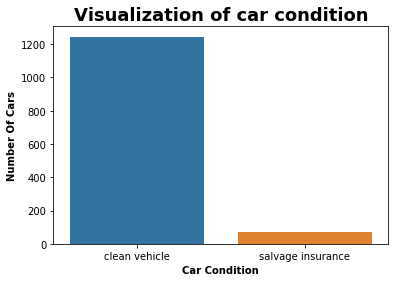

In [96]:
#Visualization of cars based on their condition
sns.countplot('title_status', data=DecBuy_df)

plt.title("Visualization of car condition", fontweight='bold', fontsize='18')
plt.xlabel("Car Condition", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

In [35]:
#Lets group the various prices of cars into three categories, using bins
bins = np.linspace(min(DecBuy_df["price"]), max(DecBuy_df["price"]), 4)
bins

array([    0., 28300., 56600., 84900.])

In [36]:
#Assigning group names to the various car price categories
group_names = ['Low-cost', 'Medium-cost', 'High-cost']

In [37]:
#Assigning the price categories to a new column based on the price column
DecBuy_df['price-category'] = pd.cut(DecBuy_df['price'], bins, labels=group_names, include_lowest=True)

DecBuy_df[['price','price-category']].head(2)

,price,price-category
3,25000,Low-cost
4,27700,Low-cost


In [38]:
#lets get details of the most expensive car in the  low-cost price category
DecBuy_df[DecBuy_df['price-category']=='Low-cost'].max()

Unnamed: 0                       2498
price                           28300
brand                             ram
model                          xterra
year                             2020
title_status        salvage insurance
mileage                        296860
color                          yellow
vin                 wf0dp3th0g4113219
lot                         167803268
state                         wyoming
country                           usa
condition             Listing Expired
car_age                            37
assum_mil                      444000
diff_mil                       402423
price-category               Low-cost
dtype: object

In [39]:
#Let's get the number of cars per price category
DecBuy_df['price-category'].value_counts()

Low-cost       1005
Medium-cost     291
High-cost        19
Name: price-category, dtype: int64

Text(0, 0.5, 'Number Of Cars')

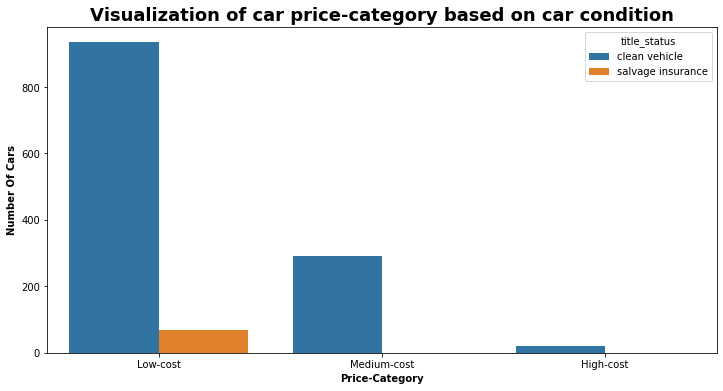

In [95]:
#Visualizing the various price categories, based on car condition
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot('price-category', data=DecBuy_df, hue='title_status')

plt.title("Visualization of car price-category based on car condition", fontweight='bold', fontsize='18')
plt.xlabel("Price-Category", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

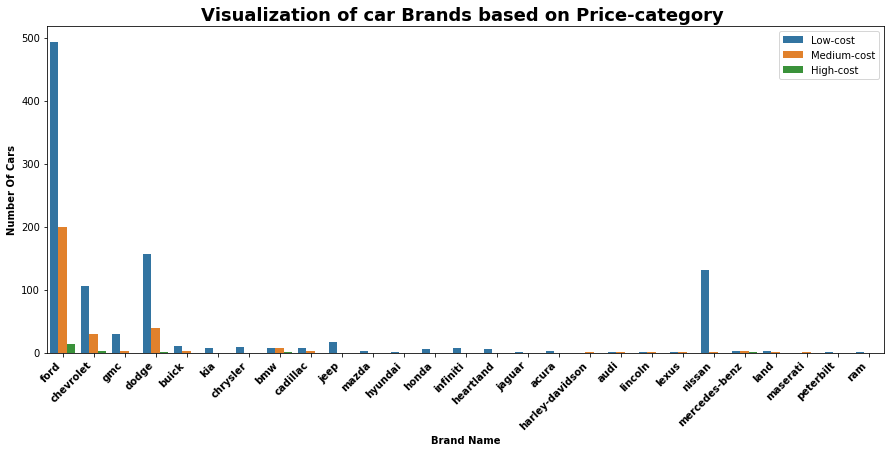

In [93]:
#Visualizing the various car brands, based on price category

fig, ax = plt.subplots(figsize=(15,6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontweight='bold')

sns.countplot('brand', data=DecBuy_df, hue='price-category')

plt.title("Visualization of car Brands based on Price-category ", fontweight='bold', fontsize='18')
plt.xlabel("Brand Name", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

plt.legend(loc='upper right')

In [42]:
#Lets find out the total number of cars per brand.
DecBuy_df['brand'].value_counts()

ford               706
dodge              197
chevrolet          137
nissan             132
gmc                 31
jeep                16
bmw                 16
buick               12
cadillac            10
chrysler             9
kia                  7
infiniti             7
honda                5
mercedes-benz        5
heartland            5
land                 4
acura                2
lincoln              2
lexus                2
mazda                2
audi                 2
harley-davidson      1
hyundai              1
maserati             1
peterbilt            1
jaguar               1
ram                  1
Name: brand, dtype: int64

In [44]:
#preview of data on the cars in the state of  Pennsylvania
DecBuy_df[DecBuy_df['state']== 'pennsylvania'].head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil,price-category
32,32,29800,chevrolet,camaro,1973,clean vehicle,46226.0,red,1q87t3n166389,167763370,pennsylvania,usa,22 hours left,48,576000,529774.0,Medium-cost
44,44,55000,ford,srw,2017,clean vehicle,15273.0,black,1ft7w3bt5hee88155,167754310,pennsylvania,usa,3 days left,4,48000,32727.0,Medium-cost
49,49,54000,ford,srw,2017,clean vehicle,26241.0,black,1ft7w3bt0hef02785,167754311,pennsylvania,usa,3 days left,4,48000,21759.0,Medium-cost
89,89,11500,ford,door,2016,clean vehicle,36855.0,black,1fmcu9gx9gua57286,167754531,pennsylvania,usa,2 days left,5,60000,23145.0,Low-cost
94,94,39800,dodge,challenger,2015,clean vehicle,3641.0,white,2c3cdzc95fh757310,167755377,pennsylvania,usa,2 days left,6,72000,68359.0,Medium-cost


In [45]:
#Lets take a look at the color columns 
DecBuy_df['color'].value_counts()

white                                      358
black                                      278
gray                                       202
silver                                     138
red                                        106
blue                                        86
no_color                                    33
green                                       17
gold                                        13
orange                                      10
brown                                        9
magnetic metallic                            5
shadow black                                 5
yellow                                       5
oxford white                                 4
ingot silver metallic                        4
billet silver metallic clearcoat             3
triple yellow tri-coat                       3
super black                                  3
charcoal                                     2
cayenne red                                  2
tuxedo black 

In [46]:
#DecBuy_df[DecBuy_df['color']=='color:']

In [47]:
#From the color column, we can see that we have several shades of a color appearing multiple times
#e.g black - super black, shadow black, tuxedo black metallic e.tc, lets group them all as black

In [48]:
# Dictionary for Color Mapping
color_map = {'white': 'White',
           'black': 'Black',
           'gray': 'Grey',
           'silver': 'Silver',
           'red': 'Red',
           'blue': 'Blue',
           'no_color': 'Unknown',
           'green': 'Green',
           'gold': 'Gold',
           'orange': 'Orange',
           'brown': 'Brown',
           'shadow black': 'Black',
           'yellow': 'Yellow',
           'oxford white' : 'White',
           'magnetic metallic': 'Grey',
           'ingot silver metallic': 'Silver',
           'triple yellow tri-coat': 'Yellow',
           'billet silver metallic clearcoat': 'Silver',
            'super black': 'Black',
            'beige': 'Beige',
            'bright white clearcoat': 'White',
            'charcoal': 'Grey',
            'ruby red metallic tinted clearcoat': 'Red',
            'charcoal': 'Grey',
             'tuxedo black metallic': 'Black',
             'black clearcoat': 'Black',
             'cayenne red': 'Red',
             'color:': 'Unknown',
             'jazz blue pearlcoat': 'Blue',
             'toreador red': 'Red',
             'ingot silver': 'Silver',
             'pearl white': 'White',
             'guard': 'Green',
             'light blue': 'Blue',
             'turquoise': 'Green',
             'lightning blue': 'Blue',
             'competition orange': 'Orange',
             'glacier white': 'White',
             'ruby red': 'Red',
             'royal crimson metallic tinted clearcoat': 'Red',
             'white platinum tri-coat metallic': 'White',
             'dark blue': 'Blue',
             'kona blue metallic': 'Blue',
             'maroon': 'Red',
             'morningsky blue': 'Blue'
            }

# Now map the car_color with color
DecBuy_df['car_color'] = DecBuy_df.color.map(color_map)

In [49]:
#Lets take a look at the data frame after mapping the colors
DecBuy_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil,price-category,car_color
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7,84000,19854.0,Low-cost,Blue
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3,36000,29346.0,Low-cost,Red
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,4,48000,24475.0,Low-cost,Grey
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,3,36000,26629.0,Low-cost,Silver
10,10,10400,dodge,coupe,2009,clean vehicle,107856.0,orange,2b3lj54t49h509675,167753874,georgia,usa,22 hours left,12,144000,36144.0,Low-cost,Orange


In [236]:
#Lets get the number of cars per color
DecBuy_df['car_color'].value_counts()

White      367
Black      290
Grey       209
Silver     146
Red        114
Blue        92
Unknown     35
Green       19
Gold        13
Orange      11
Brown        9
Yellow       8
Beige        2
Name: car_color, dtype: int64

Text(0, 0.5, 'Number Of Cars')

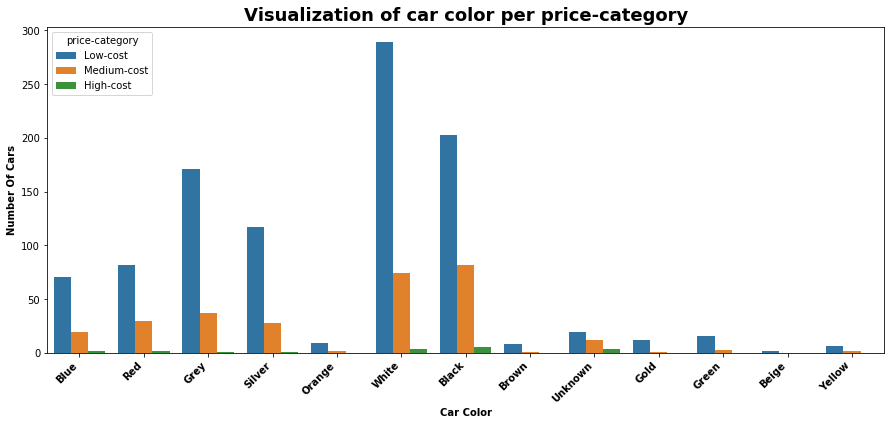

In [91]:
#Visualization of the car color based on car price category.

fig, ax = plt.subplots(figsize=(15,6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontweight='bold')

#sns.countplot('brand', data=DecBuy_df, hue='price-category')

sns.countplot('car_color', data=DecBuy_df, hue='price-category')

plt.title("Visualization of car color per price-category", fontweight='bold', fontsize='18')
plt.xlabel("Car Color", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

#plt.legend(loc='upper right')

In [51]:
#Lets get the total number of cars present in each state
DecBuy_df['state'].value_counts()

pennsylvania      186
michigan          130
florida           115
texas              99
california         95
illinois           75
wisconsin          68
new jersey         60
virginia           49
minnesota          42
oklahoma           39
new york           35
nevada             32
south carolina     28
missouri           26
massachusetts      23
georgia            23
arizona            22
north carolina     20
tennessee          16
west virginia      14
ohio               14
colorado           13
connecticut        13
mississippi        11
washington          9
arkansas            8
indiana             7
alabama             7
oregon              7
kentucky            5
utah                4
new mexico          4
louisiana           4
new hampshire       3
rhode island        2
kansas              2
vermont             2
maryland            2
wyoming             1
Name: state, dtype: int64

In [52]:
# Dictionary for Region Mapping

region_map = {'pennsylvania': 'North-East',
           'michigan': 'Mid-West',
           'florida': 'South-East',
           'texas': 'South-West',
           'california': 'West',
           'illinois': 'Mid-West',
           'wisconsin': 'Mid-West',
           'new jersey': 'North-East',
           'virginia': 'South-East',
           'minnesota': 'Mid-West',
           'oklahoma': 'South-West',
           'new york': 'North-East',
           'nevada': 'West',
           'south carolina' : 'South-East',
           'missouri': 'Mid-West',
           'massachusetts': 'North-East',
           'georgia': 'South-East',
           'arizona': 'South-West',
            'north carolina': 'South-East',
            'tennessee': 'South-East',
            'west virginia': 'South-East',
            'ohio': 'Mid-West',
            'connecticut': 'North-East',
            'colorado': 'West',
             'mississippi': 'South-East',
             'washington': 'West',
             'arkansas': 'South-East',
             'alabama': 'South-East',
              'indiana': 'Mid-West',
              'oregon': 'West',
              'kentucky': 'South-East',
              'utah': 'West',
              'new mexico': 'South-West',
              'louisiana': 'South-East',
              'new hampshire': 'North-East',
              'kansas': 'Mid-West',
              'maryland': 'North-East',
              'rhode island': 'North-East',
              'vermont': 'North-East',
              'wyoming': 'West'
             }

# Now map the Region with state
DecBuy_df['region'] = DecBuy_df.state.map(region_map)

In [53]:
DecBuy_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,car_age,assum_mil,diff_mil,price-category,car_color,region
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,7,84000,19854.0,Low-cost,Blue,South-East
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,3,36000,29346.0,Low-cost,Red,South-East
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,4,48000,24475.0,Low-cost,Grey,West
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,3,36000,26629.0,Low-cost,Silver,South-East
10,10,10400,dodge,coupe,2009,clean vehicle,107856.0,orange,2b3lj54t49h509675,167753874,georgia,usa,22 hours left,12,144000,36144.0,Low-cost,Orange,South-East


In [54]:
#Number of cars per region.
DecBuy_df['region'].value_counts()

Mid-West      364
North-East    326
South-East    300
South-West    164
West          161
Name: region, dtype: int64

Text(0, 0.5, 'Number Of Cars')

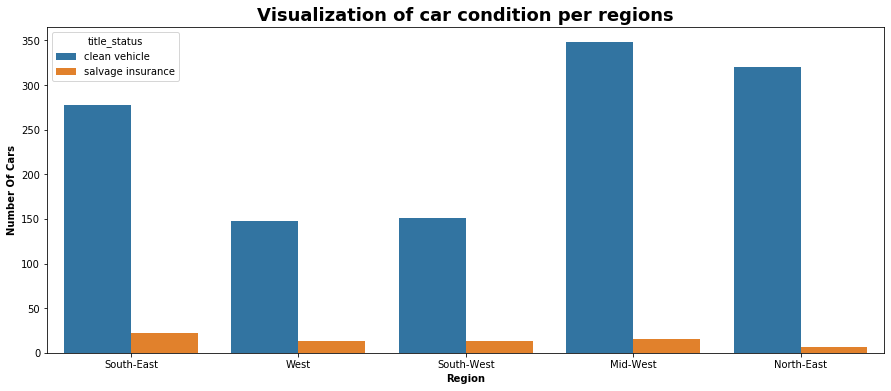

In [89]:
#Visualization car conditions per region.
plt.subplots(figsize=(15,6))

sns.countplot('region', data=DecBuy_df, hue='title_status')

plt.title("Visualization of car condition per regions", fontweight='bold', fontsize='18')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

#plt.legend(loc='upper right')

Text(0, 0.5, 'Number Of Cars')

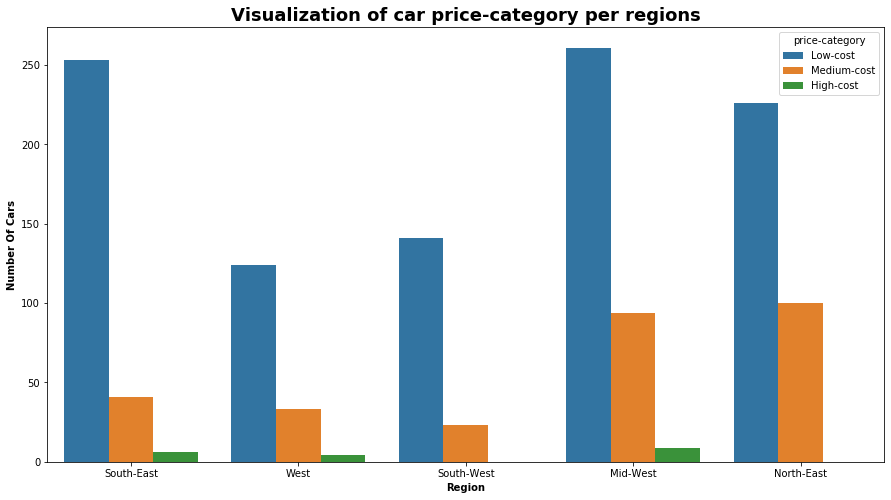

In [88]:
#Visualization car price-category per region.
plt.subplots(figsize=(15,8))
sns.countplot('region', data=DecBuy_df, hue='price-category')

plt.title("Visualization of car price-category per regions", fontweight='bold', fontsize='18')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

Text(0, 0.5, 'Number Of Cars')

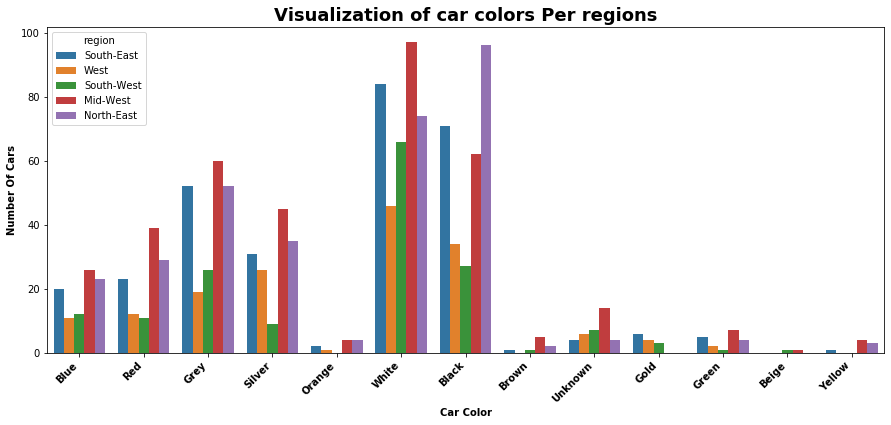

In [80]:
#Visualizing the various car colors in each regions
fig, ax = plt.subplots(figsize=(15,6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontweight='bold')

#sns.countplot('brand', data=DecBuy_df, hue='price-category')

sns.countplot('car_color', data=DecBuy_df, hue='region')
plt.title("Visualization of car colors Per regions", fontweight='bold', fontsize='18')
plt.xlabel("Car Color", fontweight='bold')
plt.ylabel("Number Of Cars", fontweight='bold')

#plt.legend(loc='upper right')